#CREDIT CARD FRAUD DETECTION 

# Data Preprocessing

**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

**Exploratory data analysis
Reading and understanding the data**


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/capstone/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape  

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Handling missing values**

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Checking the distribution of the classes**

In [ ]:
df.Class.value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df.Class.value_counts()*100/df.shape[0]


0    99.827251
1     0.172749
Name: Class, dtype: float64

we can see that the dataset is imblanced

# Data Visualization

**Visual representation**

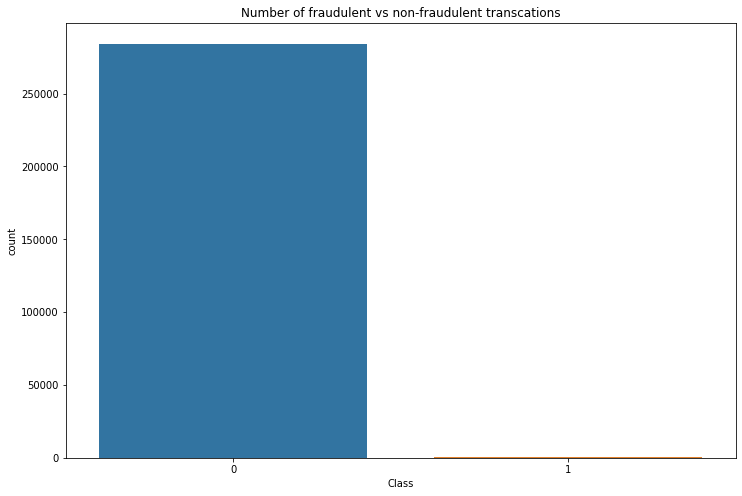

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

**Observe the distribution of classes with time**

In [ ]:
#Fraud Transactions
fraud=df[df.Class==1]
#Valid Transactions
valid=df[df.Class==0]

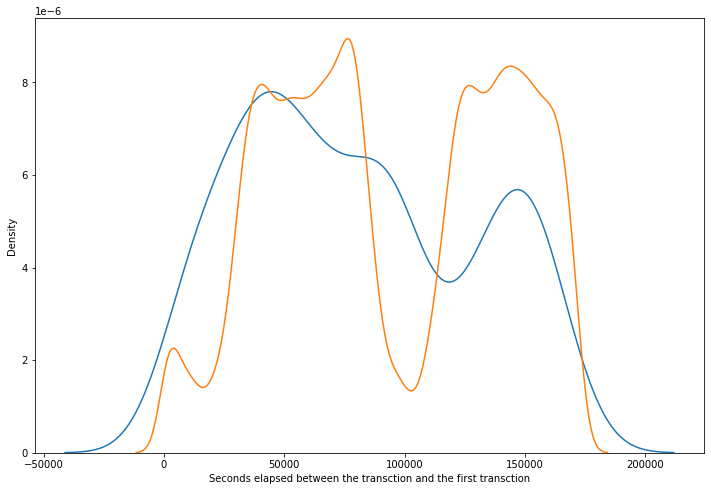

In [ ]:
# Distribution plot
plt.figure(figsize=(12,8))
ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(valid['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the time and the transction')
plt.show()

We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [ ]:
df.drop('Time', axis=1, inplace=True)

**Observe the distribution of classes with amount**

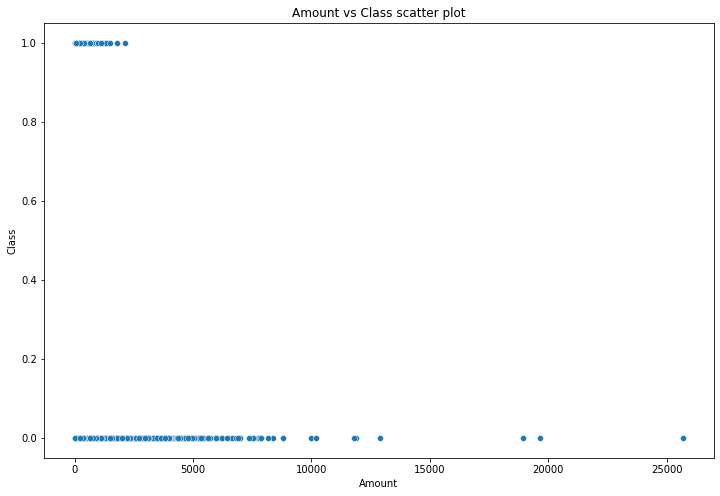

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(12,8))
sns.scatterplot(df["Amount"], df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

Clearly low amount transactions are more likely to be fraudulent than high amount transaction

# Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['Class'], axis=1)  

In [ ]:
y = df['Class']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100) 


In [ ]:
X_test.shape

(85443, 29)

In [ ]:
print('length of X_train:',len(X_train))
print('length of y_train:',len(y_train))
print('length of X_test:',len(X_test))
print('length of y_test:',len(y_test))

length of X_train: 199364
length of y_train: 199364
length of X_test: 85443
length of y_test: 85443


# Model Building

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression  

In [ ]:
Log_Reg = LogisticRegression()

In [ ]:
Log_Reg.fit(X_train,y_train) 

LogisticRegression()

In [ ]:
y_pred0 = Log_Reg.predict(X_test)  
y_pred0

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cn0 = confusion_matrix(y_test,y_pred0)  

In [ ]:
pd.crosstab(y_test,y_pred0, rownames=['Actual'], colnames=['Predicted'], margins= True)  

Predicted,0,1,All
Actual,,,
0,85278,23,85301
1,50,92,142
All,85328,115,85443


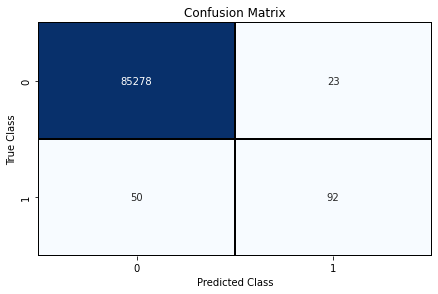

In [ ]:
sns.heatmap(cn0, annot=True, cbar=None, linewidths=.5, linecolor="Black", cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")                              
plt.show()

In [ ]:
print(classification_report(y_test,y_pred0,digits=6)) 

              precision    recall  f1-score   support

           0   0.999414  0.999730  0.999572     85301
           1   0.800000  0.647887  0.715953       142

    accuracy                       0.999146     85443
   macro avg   0.899707  0.823809  0.857763     85443
weighted avg   0.999083  0.999146  0.999101     85443



In [ ]:
logpre = precision_score(y_test,y_pred0)*100
logre = recall_score(y_test,y_pred0)*100 
logacc = accuracy_score(y_test,y_pred0)*100
logf1 = f1_score(y_test,y_pred0)*100

In [ ]:
print('Isolation forest accuracy score:',logacc)
print('Isolation forest precision score:',logpre)
print('Isolation forest recall score:',logre)
print('Isolation forest f1 score:',logf1)

Isolation forest accuracy score: 99.91456292499093
Isolation forest precision score: 80.0
Isolation forest recall score: 64.7887323943662
Isolation forest f1 score: 71.59533073929963


In [ ]:
pickle.dump(Log_Reg,open('model1.pkl','wb'))  

## Local Outlier Factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
anomalies_fraction=len(fraud)/len(df)
anomalies_fraction

0.001727485630620034

In [ ]:
lof=LocalOutlierFactor(
        n_neighbors=20,
        contamination=anomalies_fraction,
        novelty = True
          )


In [ ]:
lof.fit(X_train)

LocalOutlierFactor(contamination=0.001727485630620034, novelty=True)

In [ ]:
y_pred2 = lof.predict(X_test)

In [ ]:
y_pred2

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
np.unique(y_pred2, return_counts=True)

(array([-1,  1]), array([  163, 85280]))

In [ ]:
y_pred2[y_pred2==1]=0
y_pred2[y_pred2==-1]=1

In [ ]:
np.unique(y_pred2, return_counts=True)

(array([0, 1]), array([85280,   163]))

In [ ]:
cn2 = confusion_matrix(y_test,y_pred2)

In [ ]:
pd.crosstab(y_test,y_pred2, rownames=['Actual'], colnames=['Predicted'], margins= True)

Predicted,0,1,All
Actual,,,
0,85140,161,85301
1,140,2,142
All,85280,163,85443


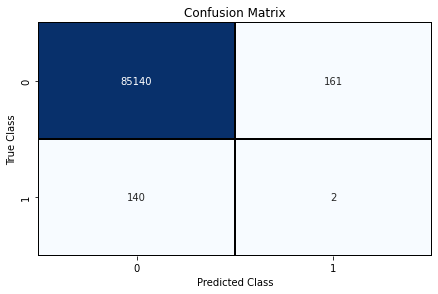

In [ ]:
sns.heatmap(cn2, annot=True, cbar=None, linewidths=.5, linecolor="Black", cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred2,digits=6))

              precision    recall  f1-score   support

           0   0.998358  0.998113  0.998235     85301
           1   0.012270  0.014085  0.013115       142

    accuracy                       0.996477     85443
   macro avg   0.505314  0.506099  0.505675     85443
weighted avg   0.996720  0.996477  0.996598     85443



In [ ]:
lofacc = accuracy_score(y_test,y_pred2)*100
lofre = recall_score(y_test,y_pred2)*100
lofpre = precision_score(y_test,y_pred2)*100
loff1 = f1_score(y_test,y_pred2)*100

In [ ]:
print('Local outlier factor accuracy score:',lofacc)
print('Local outlier factor precision score:',lofpre)
print('Local outlier factor recall score:',lofre)
print('Local outlier factor f1 score:',loff1)

Local outlier factor accuracy score: 99.6477183619489
Local outlier factor precision score: 1.2269938650306749
Local outlier factor recall score: 1.4084507042253522
Local outlier factor f1 score: 1.3114754098360655


In [ ]:
pickle.dump(lof,open('model3.pkl','wb'))

## Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest


In [ ]:
Iso_Forest=IsolationForest(contamination=anomalies_fraction, max_samples=len(X))

In [ ]:
Iso_Forest.fit(X_train,y_train)

IsolationForest(contamination=0.001727485630620034, max_samples=284807)

In [ ]:
y_pred3 = Iso_Forest.predict(X_test)
y_pred3

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
np.unique(y_pred3, return_counts=True)

(array([-1,  1]), array([  143, 85300]))

In [ ]:
y_pred3[y_pred3==1]=0
y_pred3[y_pred3==-1]=1

In [ ]:
np.unique(y_pred3, return_counts=True)

(array([0, 1]), array([85300,   143]))

In [ ]:
cn3 = confusion_matrix(y_test,y_pred3)

In [ ]:
pd.crosstab(y_test,y_pred3, rownames=['Actual'], colnames=['Predicted'], margins= True)

Predicted,0,1,All
Actual,,,
0,85194,107,85301
1,106,36,142
All,85300,143,85443


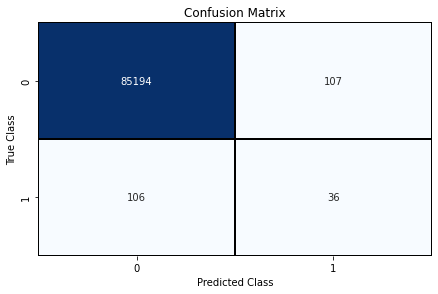

In [ ]:
sns.heatmap(cn3, annot=True, cbar=None, linewidths=.5, linecolor="Black", cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred3,digits=6))

              precision    recall  f1-score   support

           0   0.998757  0.998746  0.998751     85301
           1   0.251748  0.253521  0.252632       142

    accuracy                       0.997507     85443
   macro avg   0.625253  0.626133  0.625692     85443
weighted avg   0.997516  0.997507  0.997511     85443



In [ ]:
isofpre = precision_score(y_test,y_pred3)*100
isofre = recall_score(y_test,y_pred3)*100 
isofacc = accuracy_score(y_test,y_pred3)*100
isoff1 = f1_score(y_test,y_pred3)*100

In [ ]:
print('Isolation forest accuracy score:',isofacc)
print('Isolation forest precision score:',isofpre)
print('Isolation forest recall score:',isofre)
print('Isolation forest f1 score:',isoff1)

Isolation forest accuracy score: 99.75071100031599
Isolation forest precision score: 25.174825174825177
Isolation forest recall score: 25.352112676056336
Isolation forest f1 score: 25.263157894736842


In [ ]:
pickle.dump(Iso_Forest,open('model4.pkl','wb'))

## Neural Networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
# We are transforming data to numpy array to implementing with keras
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                       
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 [==============================] - 29s 2ms/step - loss: 0.0260 - accuracy: 0.9981
Epoch 2/5
13291/13291 [==============================] - 28s 2ms/step - loss: 0.0065 - accuracy: 0.9990
Epoch 3/5
13291/13291 [==============================] - 27s 2ms/step - loss: 0.0064 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 28s 2ms/step - loss: 0.0054 - accuracy: 0.9993
Epoch 5/5
13291/13291 [==============================] - 28s 2ms/step - loss: 0.0069 - accuracy: 0.9994


In [ ]:
y_pred4 = model.predict(X_test)

In [ ]:
y_pred4[1]

array([8.427422e-07], dtype=float32)

In [ ]:
cn4 = confusion_matrix(y_test,y_pred4.round())
cn4

array([[85275,    26],
       [   37,   105]])

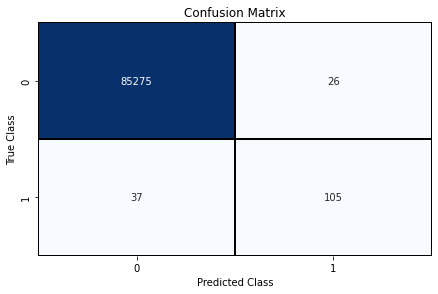

In [ ]:
sns.heatmap(cn4, annot=True, cbar=None,  linewidths=.5, linecolor="Black", cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred4.round(),digits=6))

              precision    recall  f1-score   support

           0   0.999566  0.999695  0.999631     85301
           1   0.801527  0.739437  0.769231       142

    accuracy                       0.999263     85443
   macro avg   0.900547  0.869566  0.884431     85443
weighted avg   0.999237  0.999263  0.999248     85443



In [ ]:
nnacc = accuracy_score(y_test,y_pred4.round())*100
nnpre = precision_score(y_test,y_pred4.round())*100
nnre = recall_score(y_test,y_pred4.round())*100
nnf1 = f1_score(y_test,y_pred4.round())*100

In [ ]:
print('Neural network accuracy score:',nnacc)
print('Neural network precision score:',nnpre)
print('Neural network recall score:',nnre)
print('Neural network f1 score:',nnf1)

Neural network accuracy score: 99.92626663389628
Neural network precision score: 80.1526717557252
Neural network recall score: 73.94366197183099
Neural network f1 score: 76.92307692307692


In [ ]:
model.save("prediction_model.h5")

## K-means clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans=KMeans(init='k-means++',n_clusters=2,n_init=10)

In [ ]:
kmeans.fit(X_train,y_train)

KMeans(n_clusters=2)

In [ ]:
y_pred1 = kmeans.predict(X_test)

In [ ]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
np.unique(y_pred1, return_counts=True)

(array([0, 1], dtype=int32), array([83954,  1489]))

In [ ]:
cn1 = confusion_matrix(y_test,y_pred1)

In [ ]:
pd.crosstab(y_test,y_pred1, rownames=['Actual'], colnames=['Predicted'], margins= True)

Predicted,0,1,All
Actual,,,
0,83817,1484,85301
1,137,5,142
All,83954,1489,85443


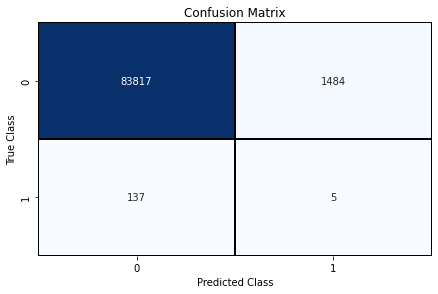

In [ ]:
sns.heatmap(cn1, annot=True, cbar=None, linewidths=.5, linecolor="Black", cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [ ]:
print(classification_report(y_test,y_pred1,digits=6))

              precision    recall  f1-score   support

           0   0.998368  0.982603  0.990423     85301
           1   0.003358  0.035211  0.006131       142

    accuracy                       0.981028     85443
   macro avg   0.500863  0.508907  0.498277     85443
weighted avg   0.996715  0.981028  0.988787     85443



In [ ]:
kre = recall_score(y_test,y_pred1)*100
kpre = precision_score(y_test,y_pred1)*100
kacc = accuracy_score(y_test,y_pred1)*100
kf1 = f1_score(y_test,y_pred1)*100


In [ ]:
print('Kmeans accuracy score:',kacc)
print('Kmeans precision score:',kpre)
print('Kmeans recall score:',kre)
print('Kmeans f1 score:',kf1)

Kmeans accuracy score: 98.10282878644242
Kmeans precision score: 0.33579583613163194
Kmeans recall score: 3.5211267605633805
Kmeans f1 score: 0.6131207847946045


In [ ]:
pickle.dump(kmeans,open('model2.pkl','wb'))

# Model Comparision

In [ ]:
table = pd.DataFrame({'Models':['Logestic Regression','Local Outlier Factor','Isolation Forest','K-Means Clustering','Neural Networks'],
                      'Accuracy':[logacc,lofacc,isofacc,kacc,nnacc],
                      'Precision':[logpre,lofpre,isofpre,kpre,nnpre],
                      'FalseNegRate':[(100-logre),(100-lofre),(100-isofre),(100-kre),(100-nnre)],
                      'Recall':[logre,lofre,isofre,kre,nnre],
                      'f1score':[logf1,loff1,isoff1,kf1,nnf1]})
table

,Models,Accuracy,Precision,FalseNegRate,Recall,f1score
0,Logestic Regression,99.914563,80.000000,35.211268,64.788732,71.595331
1,Local Outlier Factor,99.647718,1.226994,98.591549,1.408451,1.311475
2,Isolation Forest,99.750711,25.174825,74.647887,25.352113,25.263158
3,K-Means Clustering,98.102829,0.335796,96.478873,3.521127,0.613121
4,Neural Networks,99.926267,80.152672,26.056338,73.943662,76.923077


In [ ]:
table.to_csv(r'/content/drive/MyDrive/capstone/model_result.csv', index = False)

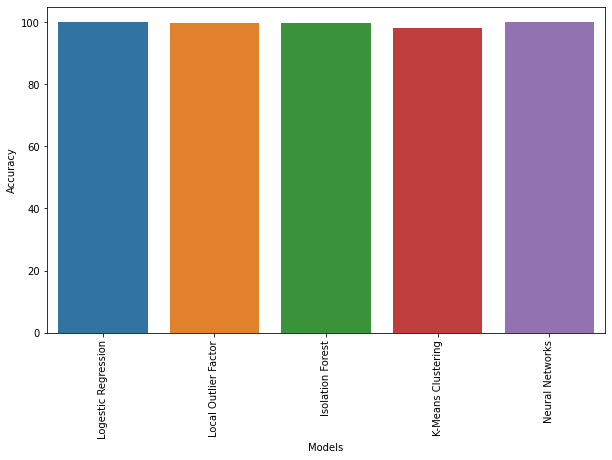

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(y = table.Accuracy,x = table.Models)
plt.xticks(rotation = 'vertical')
plt.show()

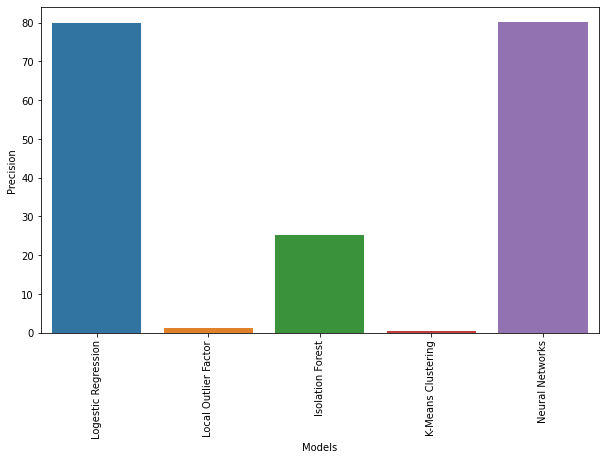

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(y = table.Precision,x = table.Models)
plt.xticks(rotation = 'vertical')
plt.show()

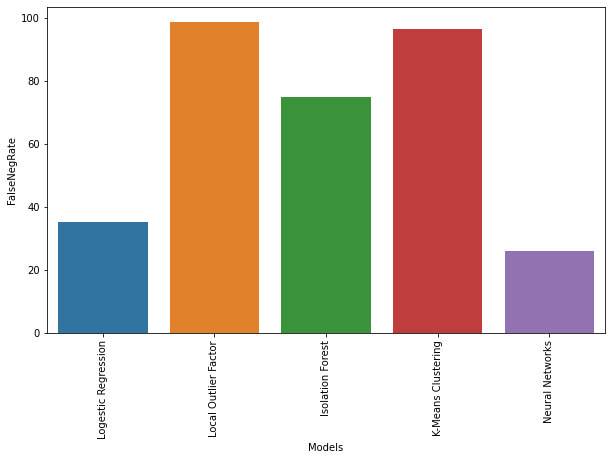

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(y = table.FalseNegRate,x = table.Models)
plt.xticks(rotation = 'vertical')
plt.show()

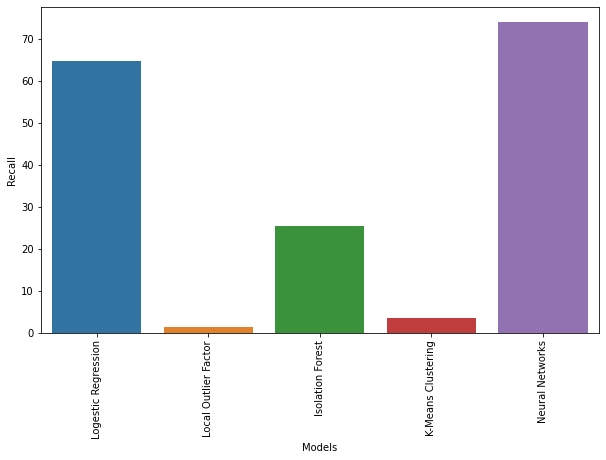

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(y = table.Recall,x = table.Models)
plt.xticks(rotation = 'vertical')
plt.show()

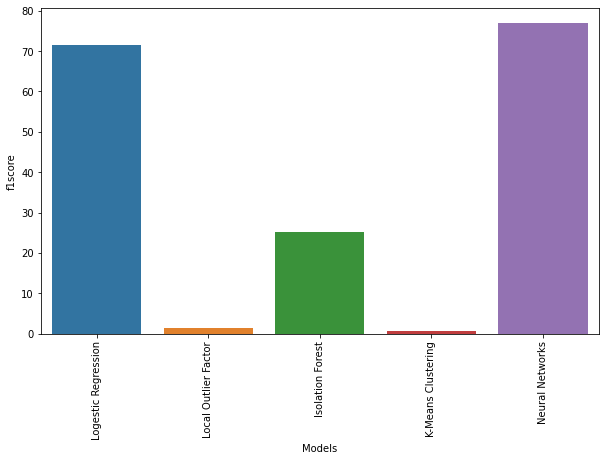

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(y = table.f1score,x = table.Models)
plt.xticks(rotation = 'vertical')
plt.show()